In [4]:
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [1]:
data

NameError: name 'data' is not defined

In [6]:
data = pd.read_csv('startUp (1).csv')
data.drop('Unnamed: 0', axis = 1, inplace = True)

data.head()

,Unnamed: 0,R&D Spend,Administration,Marketing Spend,State,Profit
0,0,165349.20,136897.80,471784.10,New York,192261.83
1,1,162597.70,151377.59,443898.53,California,191792.06
2,2,153441.51,101145.55,407934.54,Florida,191050.39
3,3,144372.41,118671.85,383199.62,New York,182901.99
4,4,142107.34,91391.77,366168.42,Florida,166187.94


In [2]:
data

NameError: name 'data' is not defined

<h3><b> Data Exploration <hr>

In [17]:
def plotter(dataframe, col1, col2, dep):
    plt.figure(figsize = (18, 4))
    sns.set(style = 'darkgrid')

    plt.subplot(1, 2, 1)
    sns.regplot(data = dataframe, x =col1, y = dep, ci = None)
    plt.title(f"Relatiionship is btw {col1} and {dep} is{(dataframe[col1].corr(dataframe[dep])).round(2)}%")



    plt.subplot(1, 2, 2)
    sns.regplot(data = dataframe, x =col2, y = dep, ci = None)
    plt.title(f"Relatiionship is btw {col2} and {dep} is {(dataframe[col2].corr(dataframe[dep])).round(2)}%")

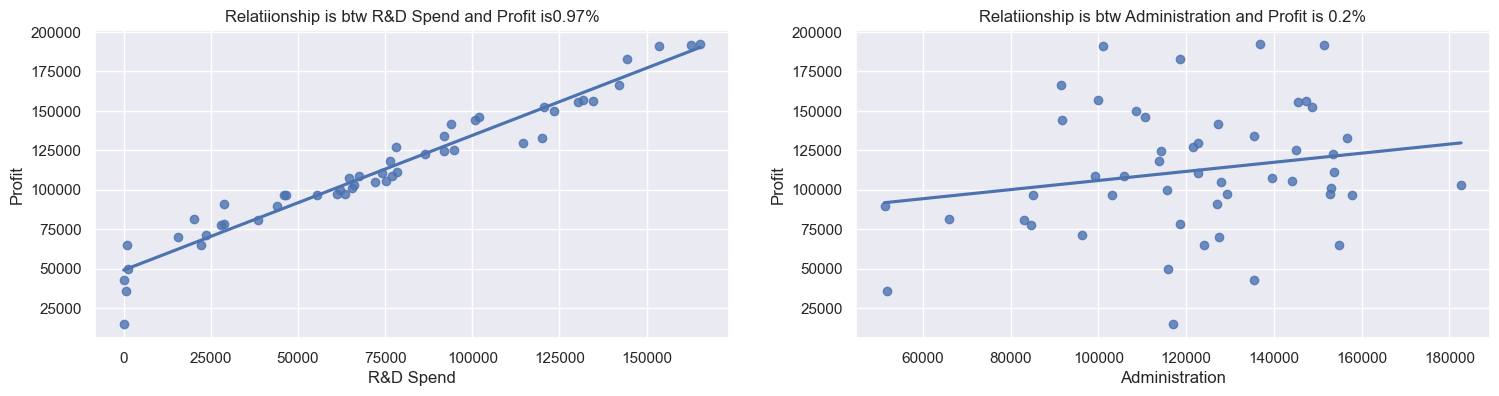

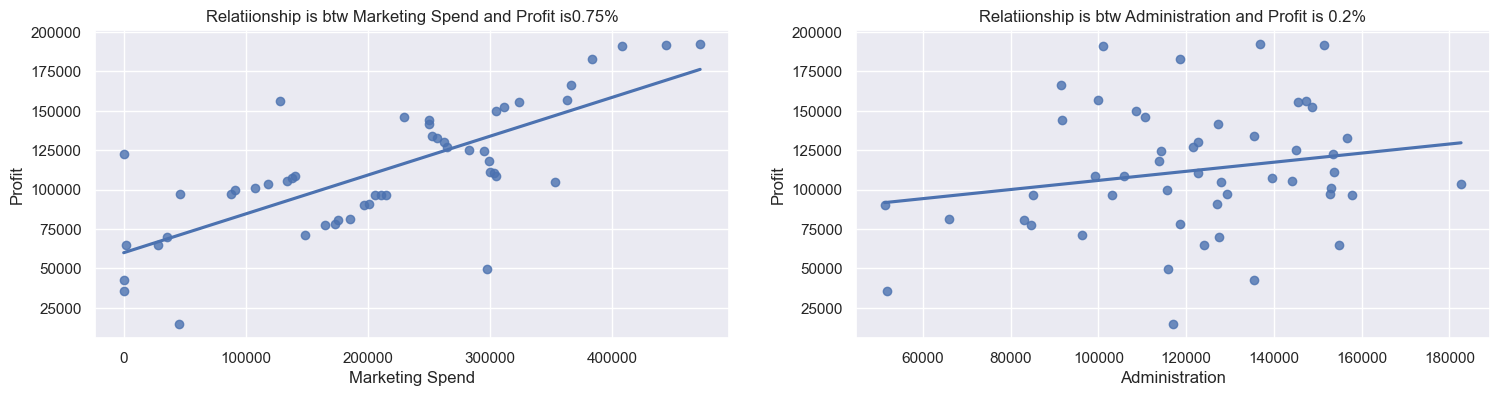

In [18]:
plotter(data, 'R&D Spend', 'Administration', 'Profit')
plotter(data, 'Marketing Spend', 'Administration', 'Profit')

<h3><b> Feature Engineering <hr>

In [20]:
df = data.copy()

In [21]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [22]:
# Using the describe method, we will ascertain the columns to be scaled by selecting the columns with high standard deviations
cols_to_scale = []
for i in df.select_dtypes(include = 'number').columns:
    if df[i].describe()[2] > 1500:
        cols_to_scale.append(i)


cols_to_scale

['R&D Spend', 'Administration', 'Marketing Spend', 'Profit']

In [24]:
# ------------------------------------------------------------Standard Scaling-----------------------------------
from sklearn.preprocessing import StandardScaler, LabelEncoder
import joblib



scaler_holder ={}

for columns in cols_to_scale[ : -1]:
    scaler = StandardScaler()
    df[columns] = scaler.fit_transform(df[[columns]])
    scaler_holder[columns + '_scale'] = scaler
    joblib.dump(scaler, open(f'{columns}_scaler.pkl', 'wb'))
    print(f"{columns} successfully scaled")

R&D Spend successfully scaled
Administration successfully scaled
Marketing Spend successfully scaled


In [ ]:
stud = {}
stud['Name'] = 'Mike'
stud['Age'] = 90


In [25]:
# Encode the categorical column 'State'

encoder = LabelEncoder()
df['State'] = encoder.fit_transform(df['State'])


joblib.dump(encoder, open('state_encoder.pkl', 'wb'))

df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,2.016411,0.560753,2.153943,2,192261.83
1,1.955860,1.082807,1.923600,0,191792.06
2,1.754364,-0.728257,1.626528,1,191050.39
3,1.554784,-0.096365,1.422210,2,182901.99
4,1.504937,-1.079919,1.281528,1,166187.94


<h3><b> Data Modelling <hr>

In [26]:
from sklearn.model_selection import  train_test_split

x = df.drop('Profit', axis = 1)
y = df.Profit


xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.15)

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Linear Regression Model Creation
linreg = LinearRegression()
linreg.fit(xtrain, ytrain)

# Cross Validation
cv = linreg.predict(xtrain)
print(f"Cross Validation  Score is  {r2_score(cv, ytrain)}")

Cross Validation  Score is  0.9460239653577299


In [28]:
#Model Testing 
test_pred = linreg.predict(xtest)
print(f"Model Test Score is: {r2_score(test_pred, ytest)}")

Model Test Score is: 0.9466332891432889


In [ ]:
# Model Saving
joblib.dump(linreg, open('startUpmodel.pkl', 'wb'))